# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Misael Bistok Ricardo
- **Email:** misael24ricardo@gmail.com
- **ID Dicoding:** misaelricardo

## Menentukan Pertanyaan Bisnis

- Apakah kota yang memiliki jumlah customer terbanyak yang sudah melakukan pemesanan?
- Pada bulan apakah terdapat pemesanan terbanyak selama tahun 2017?
- Kategori barang apakah yang memiliki rata-rata nilai review tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path = '/content/drive/MyDrive/DICODING-DATA ANALYSIS/E-commerce-public-dataset/E-Commerce Public Dataset/'

In [ ]:
customers_df = pd.read_csv(drive_path+'customers_dataset.csv')
orders_df = pd.read_csv(drive_path+'orders_dataset.csv')
order_items_df = pd.read_csv(drive_path+'order_items_dataset.csv')
order_payments_df = pd.read_csv(drive_path+'order_payments_dataset.csv')
order_reviews_df = pd.read_csv(drive_path+'order_reviews_dataset.csv')
products_df = pd.read_csv(drive_path+'products_dataset.csv')
products_category_df = pd.read_csv(drive_path+'product_category_name_translation.csv')
sellers_df = pd.read_csv(drive_path+'sellers_dataset.csv')
geolocation_df = pd.read_csv(drive_path+'geolocation_dataset.csv')

In [ ]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Assessing Data

#### Data Customers

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.duplicated().sum()

0

####Data Orders


#####orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df[orders_df['order_status']=='delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#####orders_payment_df

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df['order_id'].duplicated().sum()

4446

Jumlah order_id di order_payments_df lebih banyak daripada di orders_df. Hal ini bisa terjadi karena tabel tersebut berisikan data pembayaran di mana beberapa metode pembayarannya berupa cicilan.

In [ ]:
order_id_counts = order_payments_df['order_id'].value_counts()
duplicates = order_id_counts[order_id_counts > 1].index.tolist()
print("Lima order_id yang muncul lebih dari sekali:", duplicates[:5])

Lima order_id yang muncul lebih dari sekali: ['fa65dad1b0e818e3ccc5cb0e39231352', 'ccf804e764ed5650cd8759557269dc13', '285c2e15bebd4ac83635ccc563dc71f4', '895ab968e7bb0d5659d16cd74cd1650c', 'fedcd9f7ccdc8cba3a18defedd1a5547']


In [ ]:
order_payments_df[order_payments_df['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352'].head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86


Data di atas menunjukkan bahwa order_id fa65dad1b0e818e3ccc5cb0e39231352 muncul beberapa kali dengan nilai payment_sequential yang berbeda-beda.

#####order_reviews_df

In [ ]:
order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df['order_id'].duplicated().sum()

551

Melalui kode di atas, kita dapat melihat bahwa terdapat pesanan yang memiliki lebih dari 1 ulasan.

#####order_items_df

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada informasi di atas, bisa dilihat bahwa jumlah order_id lebih banyak daripada di table orders_df. Hal ini terjadi karena order_items_df mencatat semua barang setiap barang yang berada di dalam satu order_id.

In [ ]:
order_items_df['order_id'].duplicated().sum()

13984

In [ ]:
order_id_counts = order_items_df['order_id'].value_counts()

In [ ]:
duplicates = order_id_counts[order_id_counts > 1].index.tolist()

In [ ]:
print("Lima order_id yang muncul lebih dari 1 kali:", duplicates[:5])

Lima order_id yang muncul lebih dari 1 kali: ['8272b63d03f5f79c56e9e4120aec44ef', '1b15974a0141d54e36626dca3fdc731a', 'ab14fdcfbe524636d65ee38360e22ce8', '9ef13efd6949e4573a18964dd1bbe7f5', '428a2f660dc84138d969ccd69a0ab6d5']


In [ ]:
order_items_df[order_items_df['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22


Data di atas menampilkan salah satu order_id yang tercatat lebih dari 1 kali. Produk yang ditampilkan pun sama semua dan nilai dari price dan freight_value memiliki nilai yang sama semua. Hal ini bisa menunjukkan total ataupun nilai satuan dari barang tersebut.

####Data Products

#####products_df

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Data pada products_df menunjukkan beberapa produk tidak memiliki beberapa informasi seperti nama, jumlah foto, berat, dan informasi lainnya.

#####products_category_df

In [ ]:
products_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Data pada products_category memiliki isi yang lengkap

In [ ]:
products_category_df.duplicated().sum()

0

Data tersebut juga tidak memiliki nilai yang merupakan duplikat

### Cleaning Data

####Cleaning data Products

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Mengikut dengan pertanyaan bisnis yang ada, beberapa kolom yang ada pada products_df akan di-drop karena tidak dibutuhkan.

In [ ]:
products_df.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'],inplace=True)
products_df

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


Sesuai dengan pertanyaan bisnis yang ada, beberapa data yang tidak diperlukan akan di-drop. Pertama, kita akan drop data yang tidak dibutuhkan pada tabel orders.

In [ ]:
products_df = pd.merge(
    left= products_df,
    right = products_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


Untuk melengkapi informasi yang ada, kita akan menempatkan nama produk dalam bahasa inggris ke dalam tabel products_df.

####Cleaning data Orders

#####Cleaning orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Mengikuti pertanyaan bisnis yang ada, beberapa kolom pada orders_df akan di-drop. Selain itu, perubahan format timestamp akan dilakukan untuk mempermudah pencarian produk yang paling banyak dipesan selama bulan tertentu.

In [ ]:
orders_df.drop(columns=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],inplace=True)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


In [ ]:
orders_df['order_purchase_timestamp']= pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_purchase_timestamp']=orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [ ]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01


#####Cleaning orders_payments_df

Karena pada tahap assessing data kita menemukan bahwa order_payments_df memiliki banyak duplikasi order_id karena data tersebut mencatat tiap pembayaran yang dilakukan termasuk dengan cicilan, maka pada tahap selanjutnya saya akan menyatukan nilai dari tiap pembayaran menjadi satu untuk setiap order_id.

In [ ]:
payment_sum_df = order_payments_df.groupby("order_id").payment_value.sum().reset_index()
payment_sum_df

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


Selanjutnya kita akan menyatukan nilai payment_value dari setiap order ke dalam orders_df.

In [ ]:
orders_with_payment_df = pd.merge(
    left= orders_df,
    right = payment_sum_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_with_payment_df

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,28.62
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,85.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,195.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,271.01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,441.16


##### Cleaning order_items_df

Karena terdapat beberapa order_id yang tercatat berkali-kali dengan barang yang sama serta nilai berat dan harga yang sama, kita akan asumsi bahwa setiap nilai tersebut merupakan nilai satuan. Berikut merupakan contoh data order_id yang muncul berkali-kali karena jumlah order_item_id yang lebih dari satu.

In [ ]:
order_items_df[order_items_df['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22


In [ ]:
order_items_cleaned_df = order_items_df.groupby('order_id').agg({
    'product_id': 'first',
    'seller_id': 'first',
    'order_item_id':'count',
    'price':'mean'
}).reset_index()

order_items_cleaned_df

,order_id,product_id,seller_id,order_item_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,199.90
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,350.00
98663,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,1,99.90
98664,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,55.99


In [ ]:
order_items_cleaned_df.rename(columns={'order_item_id':'item_count'},inplace=True)
order_items_cleaned_df

,order_id,product_id,seller_id,item_count,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,199.90
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,350.00
98663,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,1,99.90
98664,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,55.99


In [ ]:
order_items_cleaned_df['item_count'].value_counts()

1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
Name: item_count, dtype: int64

Pada data di atas, kita mengambil product_id pertama dari setiap order_id karena banyaknya order_id yang mencatat barang yang sama lebih dari 1 kali. Hal yang serupa kita lakukan juga dengan seller_id. Selain itu, order_item_id yang menunjukkan id untuk setiap satuan barang yang dipesan kita catat sebagai total barang yang dipesan.

#####Cleaning order_reviews_df

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df['order_id'].duplicated().sum()

551

Berdasarkan informasi di atas, setiap pesanan yang ada di order_reviews_df memiliki sebuah nilai review_score. Akan tetapi, terdapat beberapa pesanan yang memiliki ulasan lebih dari 1 kali. Untuk kali ini kita akan mengambil review pertama dari setiap pesanan. Sesuai dengan kebutuhan pertanyaan, kita hanya mengambil beberapa kolom saja.

In [ ]:
reviews_cleaned_df = order_reviews_df.groupby('order_id').agg({
    'review_id':'first',
    'review_score':'first'
}).reset_index()

reviews_cleaned_df

,order_id,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365,5
1,00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580,4
2,000229ec398224ef6ca0657da4fc703e,0c5b33dea94867d1ac402749e5438e8b,5
3,00024acbcdf0a6daa1e931b038114c75,f4028d019cb58564807486a6aaf33817,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,940144190dcba6351888cafa43f3a3a5,5
...,...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,9185f849f32d82e216a4e025e0c50f5c,5
98669,fffcd46ef2263f404302a634eb57f7eb,be803f6a93d64719fd685c1cc610918a,5
98670,fffce4705a9662cd70adb13d4a31832d,dbdd81cd59a1a9f94a10a990b4d48dce,5
98671,fffe18544ffabc95dfada21779c9644f,fba117c9ac40d41ca7be54741f471303,5


## Exploratory Data Analysis (EDA)

###Explore Data Orders

In [ ]:
orders_with_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99441 non-null  object 
 1   customer_id               99441 non-null  object 
 2   order_status              99441 non-null  object 
 3   order_purchase_timestamp  99441 non-null  object 
 4   payment_value             99440 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


Karena pada orders_with_payment_df belum memiliki data mengenai orders secara lengkap, maka kita akan menggabungkan seluruh data yang berkaitan dengan pemesanan.

In [ ]:
orders_cleaned_df = pd.merge(
    left= orders_with_payment_df,
    right = reviews_cleaned_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_cleaned_df

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,141.46,8d5266042046a06655c8db133d120ba5,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,28.62,e50934924e227544ba8246aeb3770dd4,5.0
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,271.01,371579771219f6db2d830d50805977bb,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0


In [ ]:
orders_cleaned_df = pd.merge(
    left= orders_cleaned_df,
    right = order_items_cleaned_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_cleaned_df

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,review_id,review_score,product_id,seller_id,item_count,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1.0,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,141.46,8d5266042046a06655c8db133d120ba5,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1.0,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1.0,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1.0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,28.62,e50934924e227544ba8246aeb3770dd4,5.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,1.0,19.90
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1.0,72.00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,1.0,174.90
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,271.01,371579771219f6db2d830d50805977bb,5.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,1.0,205.99
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2.0,179.99


Setelah menyatukan seluruh informasi data yang berkaitan dengan order. Kita bisa melihat bagaimana bentuk dari data orders.

In [ ]:
orders_cleaned_df.describe()

,payment_value,review_score,item_count,price
count,99440.000000,98673.000000,98666.000000,98666.000000
mean,160.990267,4.086853,1.141731,125.919255
std,221.951257,1.347287,0.538452,190.985636
min,0.000000,1.000000,1.000000,0.850000
25%,62.010000,4.000000,1.000000,41.990000
50%,105.290000,5.000000,1.000000,79.000000
75%,176.970000,5.000000,1.000000,139.900000
max,13664.080000,5.000000,21.000000,6735.000000


Berdasarkan informasi di atas, bisa dilihat bahwa rata-rata nilai payment_value lebih besar dari nilai price. Hal ini bisa terjadi karena beberapa hal seperti payment_value juga mencatat harga pengiriman, payment_value mencatat total harga semua barang yang dipesan, ataupun pengaruh cicilan sebagai salah satu metode pembayaran.

In [ ]:
orders_cleaned_df.isna().sum()

order_id                      0
customer_id                   0
order_status                  0
order_purchase_timestamp      0
payment_value                 1
review_id                   768
review_score                768
product_id                  775
seller_id                   775
item_count                  775
price                       775
dtype: int64

Data orders sudah disatukan akan tetapi, melihat dari pertanyaan bisnis yang ada, terdapat nilai review_score yang tidak memiliki nilai sama sekali. Karena nilai yang hilang hanya sebanyak 768 dan terdapat 99440 data, maka data tersebut akan di-drop.

In [ ]:
orders_cleaned_df.dropna(axis=0,inplace=True)
orders_cleaned_df.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
payment_value               0
review_id                   0
review_score                0
product_id                  0
seller_id                   0
item_count                  0
price                       0
dtype: int64

###Explore Data Products

In [ ]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_category_name_english    623
dtype: int64

Pada tahap ini beberapa nama produk akan saya biarkan karena pengelompokkan data untuk tiap produk dapat menggunakan product_id

In [ ]:
orders_complete_df = pd.merge(
    left= orders_cleaned_df,
    right = products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_complete_df

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,review_id,review_score,product_id,seller_id,item_count,price,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1.0,29.99,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,141.46,8d5266042046a06655c8db133d120ba5,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1.0,118.70,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1.0,159.90,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1.0,45.00,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,28.62,e50934924e227544ba8246aeb3770dd4,5.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,1.0,19.90,papelaria,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1.0,72.00,beleza_saude,health_beauty
97912,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,1.0,174.90,bebes,baby
97913,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,271.01,371579771219f6db2d830d50805977bb,5.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,1.0,205.99,eletrodomesticos_2,home_appliances_2
97914,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2.0,179.99,informatica_acessorios,computers_accessories


Setelah menyatukan data mengenai tiap produk dengan seluruh data orders, kita bisa melihat barang jenis apa yang paling banyak menjadi sumber penghasilan.

In [ ]:
orders_complete_df.groupby('product_id').agg({
    'product_category_name_english' : 'first',
    'order_id':'count',
    'item_count':'sum',
    'payment_value':'sum'
}).sort_values(by='payment_value',ascending=False)

,product_category_name_english,order_id,item_count,payment_value
product_id,,,,
bb50f2e236e5eea0100680137654686c,health_beauty,187,198.0,68053.62
d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,315,343.0,60615.34
6cdd53843498f92890544667809f1595,health_beauty,149,156.0,58528.14
99a4788cb24856965c36a24e339b6058,bed_bath_table,430,478.0,50338.68
d6160fb7873f184099d9bc95e30376af,computers,35,35.0,50326.18
...,...,...,...,...
5304ff3fa35856a156e1170a6022d34d,art,1,1.0,12.22
680cc8535be7cc69544238c1d6a83fe8,pet_shop,1,1.0,11.62
0eeeb45e2f5911fd44282e5bb0c624ff,music,1,1.0,11.56


Dari data di atas, bisa terlihat bahwa produk yang termasuk dalam kategori health_beauty terjual sebanyak 198 buah dalam 187 pesanan. Walaupun jumlah pesanan dan barang yang terjual bukan paling banyak, barang ini memiliki nilai payment_value yang paling besar.

### Explore Data Customers

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Data pada customers_df berisikan informasi seperti id, kota, dan provinsi/negara bagian asal para pelanggan. Sesuai dengan pertanyaan bisnis yang ada, kita akan melihat kota dan negara bagian yang terdapat pada data.

In [ ]:
customers_df['customer_city'].value_counts().head(5)

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_city, dtype: int64

Sao Paulo adalah kota dengan asal pelanggan terbanyak pada

In [ ]:
customers_df['customer_state'].value_counts().head(5)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

SP merupakan kode untuk negara bagian dengan asal pelanggan terbanyak pada customers_df

Selanjutnya kita akan menyatukan data customers dengan data orders untuk melihat kota dan negara bagian yang paling banyak melakukan pemesanan dan mengeluarkan uang untuk membeli barang.

In [ ]:
orders_complete_df = pd.merge(
    left= orders_complete_df,
    right = customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_complete_df

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,review_id,review_score,product_id,seller_id,item_count,price,product_category_name,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1.0,29.99,utilidades_domesticas,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,141.46,8d5266042046a06655c8db133d120ba5,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1.0,118.70,perfumaria,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1.0,159.90,automotivo,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1.0,45.00,pet_shop,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,28.62,e50934924e227544ba8246aeb3770dd4,5.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,1.0,19.90,papelaria,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1.0,72.00,beleza_saude,health_beauty,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
97912,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,1.0,174.90,bebes,baby,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
97913,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,271.01,371579771219f6db2d830d50805977bb,5.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,1.0,205.99,eletrodomesticos_2,home_appliances_2,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
97914,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2.0,179.99,informatica_acessorios,computers_accessories,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
orders_complete_df.groupby('customer_city').agg({
    'order_id':'count',
    'payment_value':'sum'
}).sort_values(by='payment_value',ascending=False).head(5)

,order_id,payment_value
customer_city,,
sao paulo,15291,2157247.60
rio de janeiro,6749,1135815.06
belo horizonte,2731,413076.94
brasilia,2106,350971.23
curitiba,1501,244045.69


Dari informasi di atas, kita bisa melihat kota asal pelanggan dengan total nilai payment_value terbesar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kota yang memiliki jumlah customer terbanyak yang sudah melakukan pemesanan?

Dalam menjawab pertanyaan ini, kita perlu mengelompokkan data pada orders untuk setiap kota.

In [ ]:
most_cities_orders_df = orders_complete_df.groupby('customer_city').agg({
    'customer_state':'first',
    'customer_id':'nunique',
    'order_id':'nunique'
}).sort_values(by='order_id',ascending=False).reset_index()

most_cities_orders_df.rename(columns={
    'customer_id':'customer_count',
    'order_id':'order_count'
},inplace=True)

most_cities_orders_df

,customer_city,customer_state,customer_count,order_count
0,sao paulo,SP,15291,15291
1,rio de janeiro,RJ,6749,6749
2,belo horizonte,MG,2731,2731
3,brasilia,DF,2106,2106
4,curitiba,PR,1501,1501
...,...,...,...,...
4103,rio doce,MG,1,1
4104,iaras,SP,1,1
4105,ibarama,RS,1,1
4106,ibema,PR,1,1


Data di atas menunjukkan terdapat 4108 kota di dalam data orders yang ada. Untuk data customer_id kita hitung berapa yang unik untuk menghitung ada berapa pelanggan dalam satu kota. Hal yang serupa kita gunakan pada order_id untuk menghitung berapa order yang dilakukan oleh pelanggan dari kota tertentu.

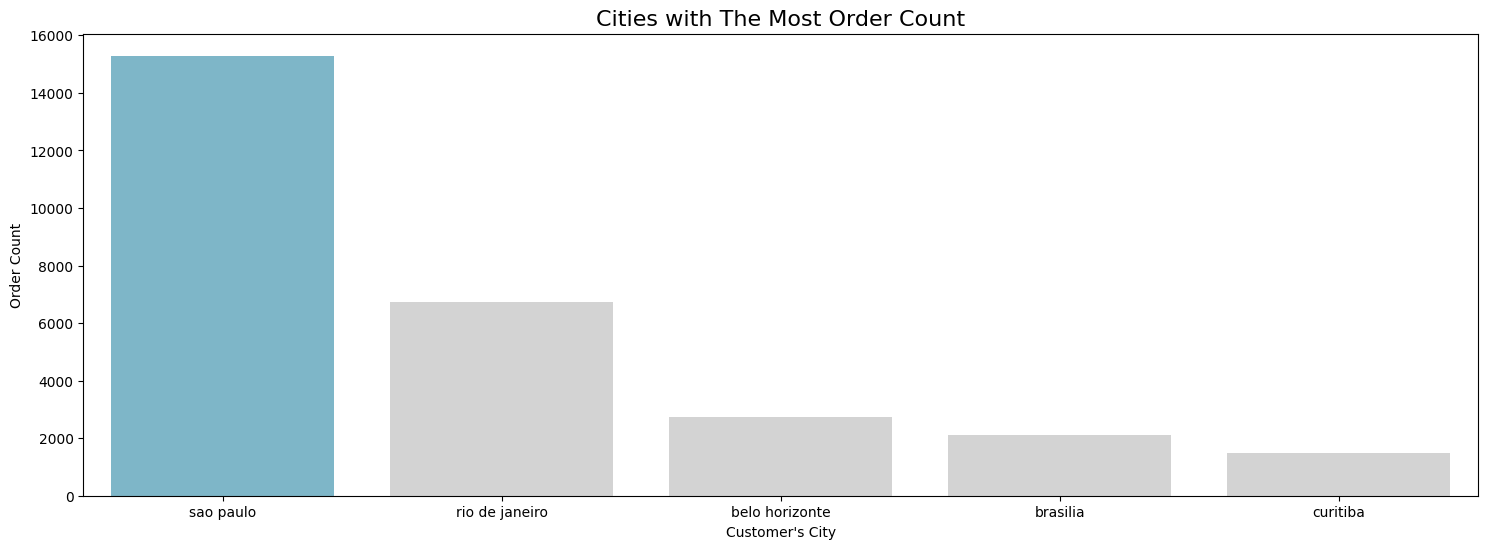

In [ ]:
plt.figure(figsize=(18, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plot = sns.barplot(x="customer_city", y="order_count", hue="customer_city", data=most_cities_orders_df.head(5), palette=colors)
plot.set(xlabel="Customer's City", ylabel="Order Count")
plt.title("Cities with The Most Order Count", loc="center", fontsize=16)
plt.show()

### Pertanyaan 2: Pada bulan apakah terdapat pemesanan terbanyak selama tahun 2017?

Untuk menjawab pertanyaan ini, kita akan memfilter data untuk menampilkan barang yang dipesan pada seluruh tahun 2017.

In [ ]:
orders_2017_df = orders_complete_df[orders_complete_df['order_purchase_timestamp'].str.startswith('2017')]
orders_2017_df

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,review_id,review_score,product_id,seller_id,item_count,price,product_category_name,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1.0,29.990,utilidades_domesticas,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1.0,45.000,pet_shop,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07,175.26,89b738e70a1ce346db29a20fb2910161,4.0,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,1.0,147.900,automotivo,auto,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04,65.95,e07549ef5311abcc92ba1784b093fb56,2.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,1.0,49.900,NaN,NaN,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05,75.16,07d67dd06ed5f88bef11ef6b464e79ae,5.0,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,1.0,59.990,automotivo,auto,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97908,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10,106.79,ebd75732b5804e934123d11ec1f11db0,5.0,c982dbea53b864f4d27c1d36f14b6053,1caf283236cd69af44cbc09a0a1e7d32,2.0,34.505,brinquedos,toys,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT
97909,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01,389.43,e8995c053d3db2d9c07407efe7de52dd,5.0,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,1.0,370.000,beleza_saude,health_beauty,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG
97910,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02,155.99,96e8f371a3983122b739944537e15525,5.0,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,1.0,139.900,moveis_decoracao,furniture_decor,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP
97911,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1.0,72.000,beleza_saude,health_beauty,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP


Setelah mengumpulkan semua data pemesanan yang dipesan pada 2017, kita akan melakukan pengelompokkan untuk setiap bulan. Kita juga akan menampilkan total jumlah barang yang dipesan, nilai dari pembayaran, serta jumlah order yang ada pada setiap bulan.

In [ ]:
most_sold_monthly_2017_df = orders_2017_df.groupby('order_purchase_timestamp').agg({
    'item_count':'sum',
    'order_id':'count',
    'payment_value':'sum'
}).sort_values(by='order_purchase_timestamp',ascending=True).reset_index()

most_sold_monthly_2017_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)

most_sold_monthly_2017_df

,order_purchase_timestamp,item_count,order_count,payment_value
0,2017-01,944.0,779,135886.81
1,2017-02,1940.0,1722,284882.27
2,2017-03,2974.0,2621,425617.21
3,2017-04,2661.0,2374,409165.23
4,2017-05,4096.0,3626,580905.63
5,2017-06,3557.0,3192,499819.57
6,2017-07,4480.0,3934,579310.82
7,2017-08,4851.0,4261,660640.73
8,2017-09,4794.0,4209,715513.44
9,2017-10,5269.0,4530,760587.26


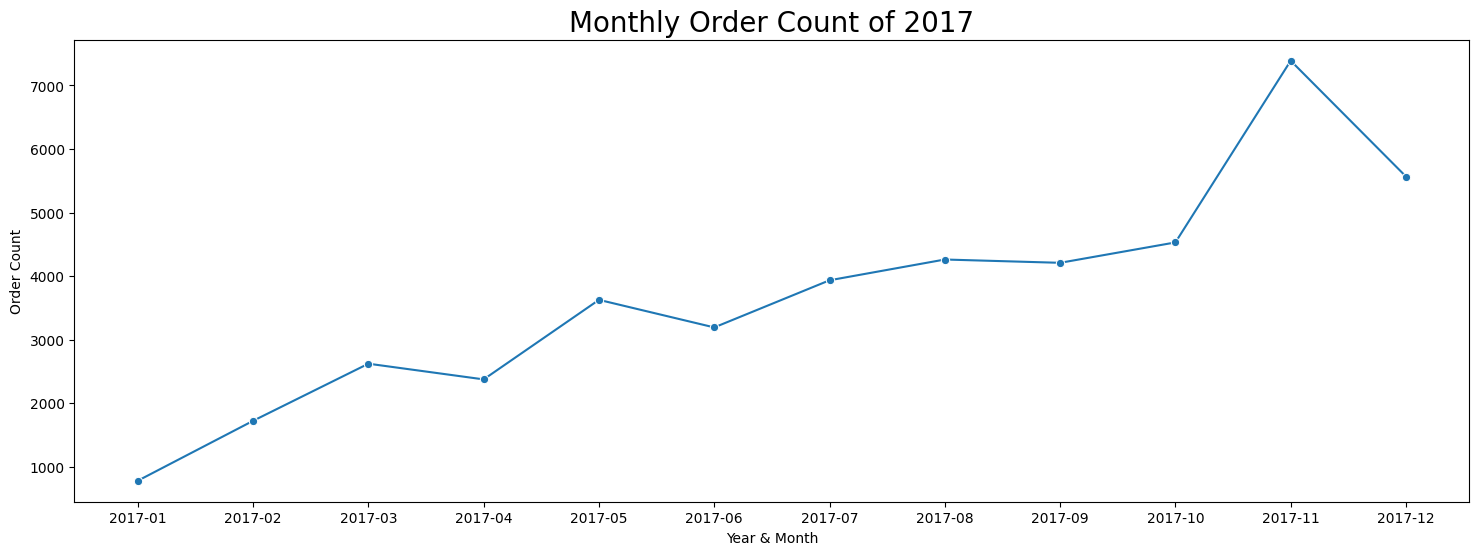

In [ ]:
plt.figure(figsize=(18, 6))
plot = sns.lineplot(x="order_purchase_timestamp", y="order_count", data=most_sold_monthly_2017_df, marker='o')
plot.set(xlabel="Year & Month", ylabel="Order Count")
plt.title("Monthly Order Count of 2017", loc="center", fontsize=20)
plt.show()

In [ ]:
most_orders_month = most_sold_monthly_2017_df.loc[most_sold_monthly_2017_df['order_count'].idxmax()]
least_orders_month = most_sold_monthly_2017_df.loc[most_sold_monthly_2017_df['order_count'].idxmin()]

In [ ]:
print("Bulan dengan jumlah order terbanyak:")
print(most_orders_month[['order_purchase_timestamp', 'order_count']])

print("\nBulan dengan jumlah order terdikit:")
print(least_orders_month[['order_purchase_timestamp', 'order_count']])

Bulan dengan jumlah order terbanyak:
order_purchase_timestamp    2017-11
order_count                    7390
Name: 10, dtype: object

Bulan dengan jumlah order terdikit:
order_purchase_timestamp    2017-01
order_count                     779
Name: 0, dtype: object


Informasi di atas menunjukkan bahwa bulan dengan jumlah pesanan pada tahun 2017 adalah pada bulan November. Sedangkan untuk bulan dengan jumlah pesanan terdikit ada pada bulan Januari.

###Pertanyaan 3: Kategori apakah yang memiliki rata-rata nilai review tertinggi dan terendah?

Untuk pertanyaan ini, kita mengelompokkan rata-rata nilai review untuk setiap kategori barang. Kita akan mencatat jumlahnya juga untuk memastikan bahwa nilai rata-rata tersebut bukan dari satu atau sedikit ulasan.

In [ ]:
avg_review_score_df = orders_complete_df.groupby('product_category_name').agg({
    'product_category_name_english':'first',
    'review_id':'count',
    'review_score':'mean'
}).sort_values(by='review_score',ascending=False).reset_index()

avg_review_score_df.rename(columns={
    'review_id':'review_count',
    'review_score':'avg_review_score'
},inplace=True)

avg_review_score_df

,product_category_name,product_category_name_english,review_count,avg_review_score
0,cds_dvds_musicais,cds_dvds_musicals,12,4.666667
1,la_cuisine,la_cuisine,11,4.545455
2,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,8,4.500000
3,livros_interesse_geral,books_general_interest,505,4.467327
4,construcao_ferramentas_ferramentas,costruction_tools_tools,94,4.425532
...,...,...,...,...
68,fashion_roupa_feminina,fashio_female_clothing,39,3.692308
69,moveis_escritorio,office_furniture,1255,3.624701
70,portateis_cozinha_e_preparadores_de_alimentos,None,14,3.428571
71,pc_gamer,None,7,3.428571


Karena terdapat banyak barang yang memiliki nilai review tinggi tetapi jumlah reviewnya sedikit, maka saya hanya akan mengambil rata-rata nilai review dari kategori barang yang total reviewnya melebihi rata-rata jumlah review dari seluruh kategori barang.

In [ ]:
avg_review_count = avg_review_score_df['review_count'].mean()
avg_review_score_df = avg_review_score_df[avg_review_score_df['review_count'] > avg_review_count].sort_values(by='avg_review_score',ascending=False)
avg_review_score_df

,product_category_name,product_category_name_english,review_count,avg_review_score
14,papelaria,stationery,2278,4.255926
15,pet_shop,pet_shop,1695,4.244248
19,perfumaria,perfumery,3137,4.206567
23,brinquedos,toys,3828,4.190961
24,fashion_bolsas_e_acessorios,fashion_bags_accessories,1845,4.190244
26,beleza_saude,health_beauty,8730,4.186254
29,cool_stuff,cool_stuff,3570,4.178992
31,esporte_lazer,sports_leisure,7630,4.172215
34,utilidades_domesticas,housewares,5789,4.151149
35,ferramentas_jardim,garden_tools,3461,4.149090


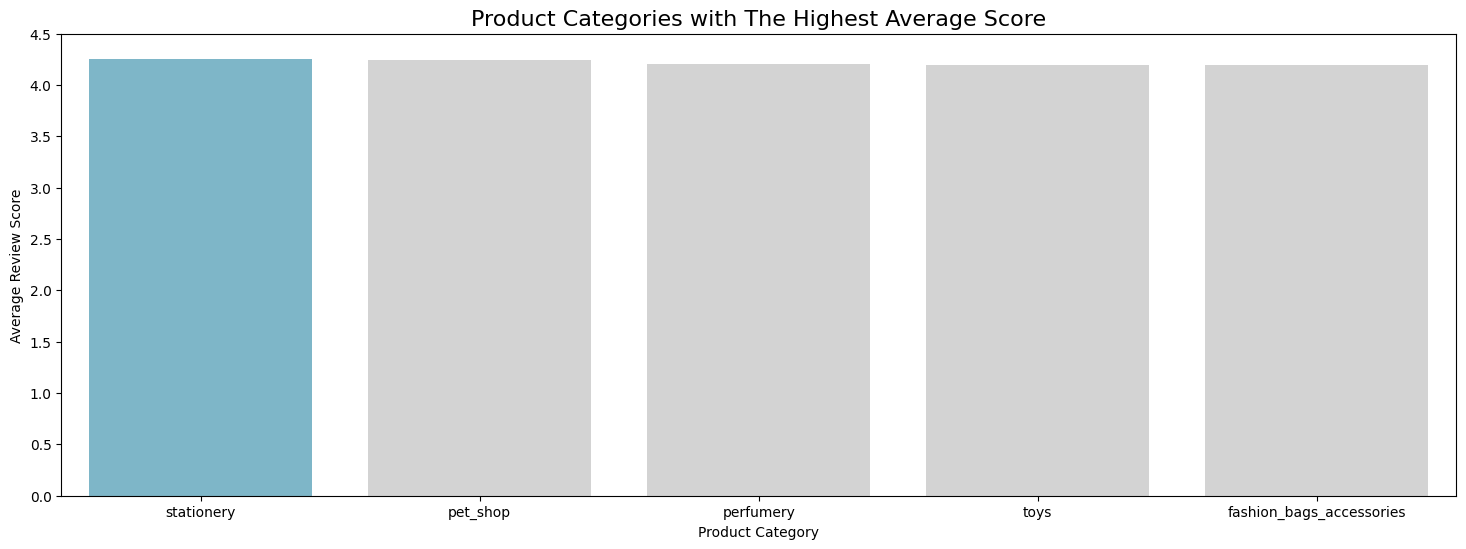

In [ ]:
plt.figure(figsize=(18, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plot = sns.barplot(x="product_category_name_english", y="avg_review_score", hue="product_category_name_english", data=avg_review_score_df.head(5), palette=colors)
plot.set(xlabel="Product Category", ylabel="Average Review Score")
plt.title("Product Categories with The Highest Average Score", loc="center", fontsize=16)
plt.ylim(0, 4.5)
plt.show()

Setelah mengumpulkan kategori produk yang memiliki banyak review, dapat dilihat bahwa kategori stationery merupakan kategori produk dengan rata-rata nilai review tertinggi dengan jumlah review yang cukup banyak. Hasil dari chart tersebut menunjukkan bahwa kategori barang dengan rata-rata review tertinggi memiliki rata-rata nilai review yang serupa.

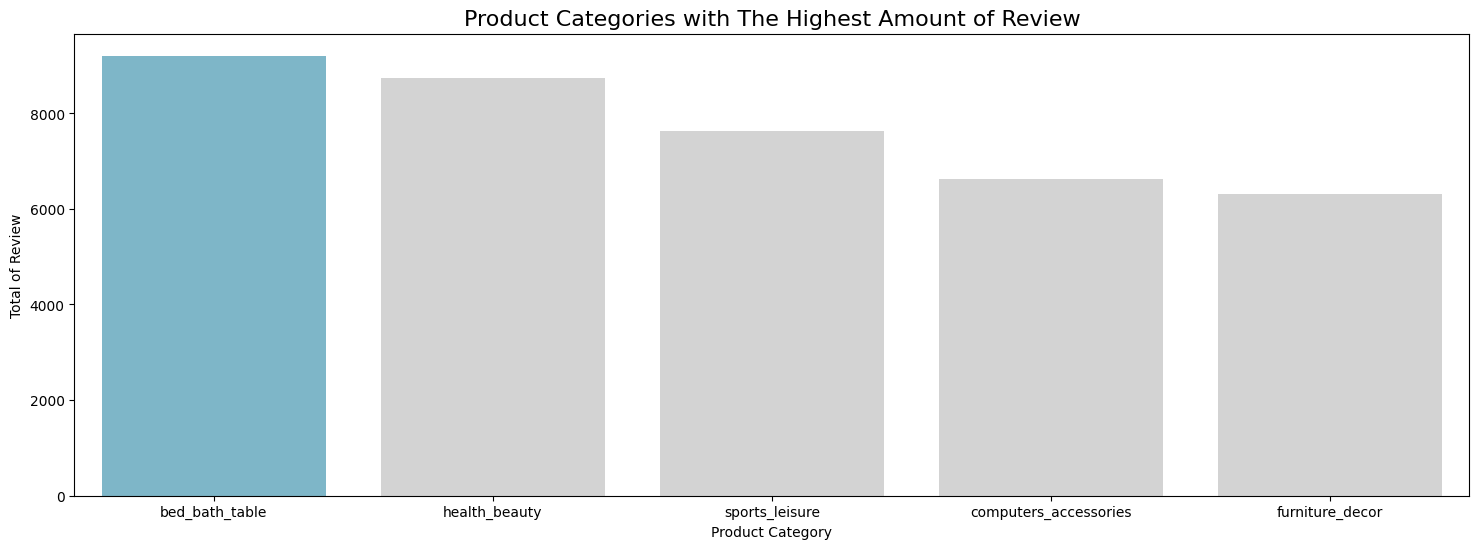

In [ ]:
plt.figure(figsize=(18, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plot = sns.barplot(x="product_category_name_english", y="review_count", hue="product_category_name_english", data=avg_review_score_df.sort_values(by="review_count",ascending=False).head(5), palette=colors)
plot.set(xlabel="Product Category", ylabel="Total of Review")
plt.title("Product Categories with The Highest Amount of Review", loc="center", fontsize=16)
plt.show()

Akan tetapi, kategori produk yang memiliki jumlah review paling banyak adalah bed_bath_table. Sedangkan stationery tidak masuk dalam 5 kategori dengan jumlah terbanyak.

## Conclusion

###Apakah kota yang memiliki jumlah customer terbanyak yang sudah melakukan pemesanan?

Setelah dilakukan analisis, berdasarkan data orders yang sudah dirapikan, Sao Paulo merupakan kota asal para pelanggan yang paling sering melakukan pemesanan dengan total pemesanan sebanyak 15921 kali.

###Pada bulan apakah terdapat pemesanan terbanyak selama tahun 2017?

Melalui pengumpulan informasi dan visualisasi penjualan selama tahun 2017, bulan November adalah bulan di mana terdapat jumlah pemesanan paling banyak dengan total pesanan sebanyak 7390.

###Kategori barang apakah yang memiliki rata-rata nilai review tertinggi?

Kategori barang yang memiliki rata-rata nilai review tertinggi adalah stationery. Akan tetapi, kategori barang lain yang masih dapat dianggap memiliki rata-rata nilai review yang tinggi juga memiliki angka yang serupa dengan range sekitar 4.0-4.2

##Export

In [ ]:
orders_complete_df.to_csv('orders_complete.csv',index=False)